In [ ]:
# This will be my homework for W3D2

In [2]:
import random
import matplotlib.pyplot as plt
import math
import statistics

In [3]:
%matplotlib inline

In [4]:
def coin_flipper(num):
    ## Heads is equal to 1, Tails is equal to 0
    return [random.randint(0,1) for x in range(num)]

def coin_flip_simulator():
    return [coin_flipper(2**exp) for exp in [0, 1, 2, 4, 8, 16]]

def get_difference(collection):
    return [collection[x].count(0) - collection[x].count(1) for x in range(len(collection))]

def get_ratio(collection):
    return [collection[x].count(1) / collection[x].count(0) for x in range(len(collection))]

In [5]:
a = coin_flip_simulator()
b = get_difference(a)
c = get_ratio(a)

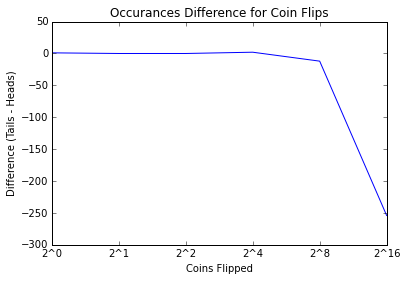

In [6]:
plt.plot(b)
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
plt.title("Occurances Difference for Coin Flips")
plt.ylabel("Difference (Tails - Heads)")
plt.xlabel("Coins Flipped")
plt.xticks(range(6), x1)
plt.show()

There appears to be more heads occuring than tails.  

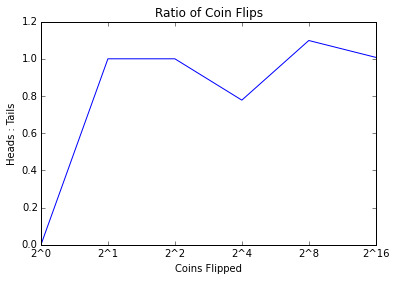

In [7]:
plt.plot(c)
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
plt.title("Ratio of Coin Flips")
plt.ylabel("Heads : Tails")
plt.xlabel("Coins Flipped")
plt.xticks(range(6), x1)
plt.show()

Heads occur at a rough average of 1.5 times more than tails.

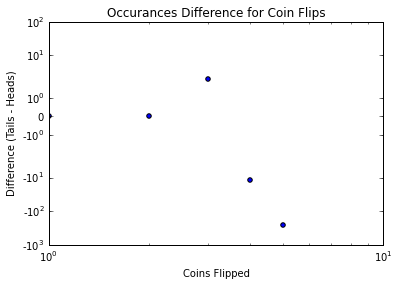

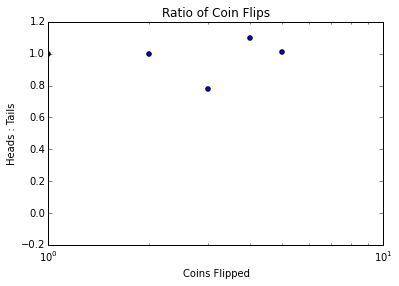

In [8]:
plt.scatter(range(6), b)
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
plt.title("Occurances Difference for Coin Flips")
plt.ylabel("Difference (Tails - Heads)")
plt.xlabel("Coins Flipped")
plt.xticks(range(6), x1)
plt.xscale('log')
plt.yscale('symlog')
plt.show()

plt.scatter(range(6), c)
x1 = ["2^0", "2^1", "2^2", "2^4", "2^8", "2^16"]
plt.title("Ratio of Coin Flips")
plt.ylabel("Heads : Tails")
plt.xlabel("Coins Flipped")
plt.xticks(range(6), x1)
plt.xscale('log')
plt.show()

For the occurances difference, Heads apears to be occuring at an exponentially greater rate.  For the line plot of the occurances difference, it also appeared at a seemingly exponential rate, but this scatter plot makes the jumps look a lot bigger.
For the ratio, the rates appear about the same, but what I didn't see before was the tapering off.  It looks like the ratio will eventually even out at 1x greater ratio for heads than tails.

In [20]:
def hard_coin_flip_simulator(num):
    return [coin_flipper(100) for x in range(num)]

def mean(collection):
    return sum(collection) / len(collection)

In [15]:
yyz = hard_coin_flip_simulator(20)
ratio_hard = get_ratio(yyz)
avg_ratio = mean(ratio_hard)
print(avg_ratio)

0.9966326835452219


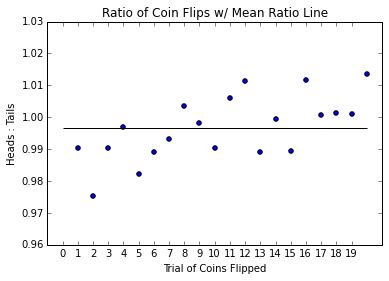

In [16]:
plt.scatter(range(1, 21), ratio_hard)
plt.title("Ratio of Coin Flips w/ Mean Ratio Line")
plt.ylabel("Heads : Tails")
plt.xlabel("Trial of Coins Flipped")
plt.xticks(range(20))
plt.hlines(avg_ratio, xmin=0, xmax=20)
plt.show()

One thing I found quite interesting in this, the average ratio of Heads to Tails is just below 1.  Now, this may sound like a "duh" moment since there is a 50% chance to get a result, but my previous graphs led me to belieive that either heads or tails would occur more than the other.  While this did happen for certain samples, as a whole this was not the case.  I found this average ratio very interesting.

In [17]:
uuh = statistics.stdev(ratio_hard)
print(uuh)

0.010026953187239453


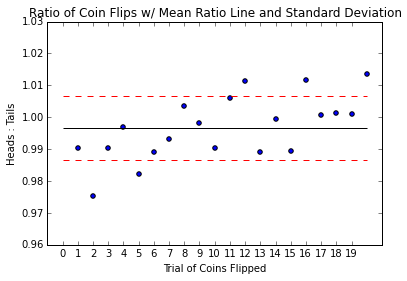

In [18]:
plt.scatter(range(1, 21), ratio_hard)
plt.title("Ratio of Coin Flips w/ Mean Ratio Line and Standard Deviation")
plt.ylabel("Heads : Tails")
plt.xlabel("Trial of Coins Flipped")
plt.xticks(range(20))
plt.hlines(avg_ratio, xmin=0, xmax=20)
plt.hlines(avg_ratio - uuh, xmin=0, xmax=20, linestyles="dashed", color="red")
plt.hlines(avg_ratio + uuh, xmin=0, xmax=20, linestyles="dashed", color="red")
plt.show()

I found it interesting that almost all of the ratios fell inside of the standard deviation of the ratios.  I understand that this is the purpose and meaning of standard deviation, but it makes a lot of sense in visual form.  I was pleased with this graph.

In [19]:
def ratio_heads_total_flips(collection):
    return [collection[x].count(1) / len(collection[x]) for x in range(len(collection))]

In [21]:
ttyt = hard_coin_flip_simulator(100000)

In [23]:
bessie = ratio_heads_total_flips(ttyt)
barry = statistics.stdev(bessie)
bingo = mean(bessie)

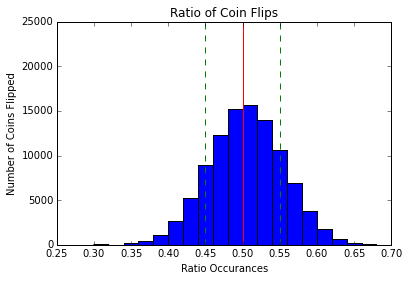

In [29]:
plt.hist(bessie, bins=20)
plt.title("Ratio of Coin Flips")
plt.ylabel("Number of Coins Flipped")
plt.xlabel("Ratio Occurances")
plt.vlines(bingo, ymin=0, ymax=25000, color="red")
plt.vlines(bingo + barry, ymin=0, ymax=25000, color="green", linestyles="dashed")

plt.vlines(bingo - barry, ymin=0, ymax=25000, color="green", linestyles="dashed")
plt.show()

Again, the ratio appears to be just around 0.5.  With so many flips, it gives me a better understanding that the two sides average out over the long run, for the most part.

In [30]:
jja = hard_coin_flip_simulator(100000)

In [31]:
ajj = ratio_heads_total_flips(jja)

In [33]:
aja = mean(ajj)
jaa = statistics.stdev(ajj)

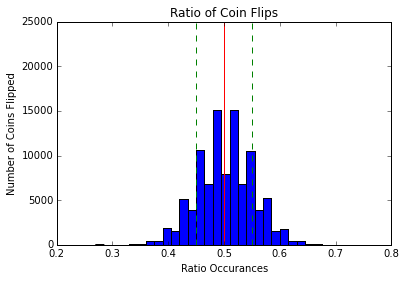

In [34]:
plt.hist(ajj, bins=30)
plt.title("Ratio of Coin Flips")
plt.ylabel("Number of Coins Flipped")
plt.vlines(aja, ymin=0, ymax=25000, color="red")
plt.vlines(aja + jaa, ymin=0, ymax=25000, color="green", linestyles="dashed")
plt.vlines(aja - jaa, ymin=0, ymax=25000, color="green", linestyles="dashed")
plt.xlabel("Ratio Occurances")
plt.show()

Looking at this extremely large sample, I see that the ratio is right at 0.5, meaning half the time you flip a coin, you will get heads, and the other half you will get tails.  It was very cool to see this extremely large sample plotted.  But just like the others, the ratio does hover right around 1.

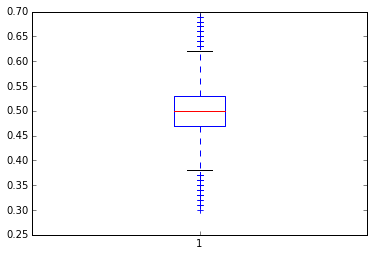

In [35]:
plt.boxplot(bessie)
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax)
plt.show()

I like this boxplot a lot.  It shows you where the bulk of your data is, giving you the mean.  It just appears clearer to me.  You can see here that the average over time will give you 50% heads and 50% tails when it comes to flipping coins.  

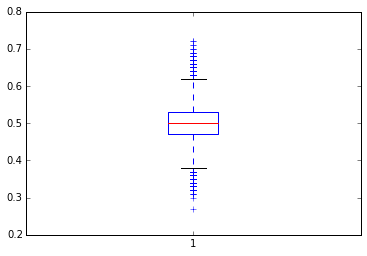

In [36]:
plt.boxplot(ajj)
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax)
plt.show()

Again, I like the boxplot.  By showing you where the bulk of the data is, you can see if you have a real result (if your data points are located close to each other.  This sample has a wide range of the ratio of heads to total flips, but still has a mean of 0.5, showing that over time you will flip the same number of heads as tails.